Food Safety Index   


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

Exploratory Data Analysis

Lets have a look at the World Hunger Index

In [17]:
df_hunger_index = pd.read_csv("data/global-hunger-index.csv")

In [18]:
df_hunger_index.describe

<bound method NDFrame.describe of           Entity Code  Year   ghi  \
0    Afghanistan  AFG  2000  50.9   
1    Afghanistan  AFG  2006  42.7   
2    Afghanistan  AFG  2012  34.3   
3    Afghanistan  AFG  2021  28.3   
4        Albania  ALB  2000  20.7   
..           ...  ...   ...   ...   
466        Yemen  YEM  2006  38.8   
467        Yemen  YEM  2012  38.4   
468        Yemen  YEM  2021  45.1   
469       Zambia  ZMB  2021  27.5   
470     Zimbabwe  ZWE  2021  27.5   

                                           annotations  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
466                                                NaN  
467                                                NaN  
468     

In [20]:
df_hunger_index_2021 = df_hunger_index[df_hunger_index["Year"]==2021].drop('annotations', axis=1)

In [25]:
df_hunger_index_2021.dropna(inplace=True)

In [120]:
fig = px.choropleth(df_hunger_index_2021, locations='Code', color='ghi', hover_name='Entity',
                    animation_frame="Year",
                    title='Global Hunger Index by Country',width=1000, height=600)
fig.show()

We now look at the Food Safety Index of Countries

The Global Food Security Index (GFSI) considers food affordability, availability, quality and safety, 
and sustainability and adaptation across 113 countries. The index is a dynamic quantitative 
and qualitative benchmarking model constructed from 68 unique indicators that measure the drivers 
of food security across both developing and developed countries.

In [175]:
df_food_safety = pd.read_csv("data/FSI_Index.csv")
df_regions = pd.read_csv("data/regions.csv")
df_regions.rename(columns = {'name':'Name'}, inplace = True)
df_food_safety = pd.merge(df_food_safety, df_regions, on="Name", how="left")

#Average FSI over the years 2012 - 2022
df_food_safety = df_food_safety.assign(averageFSI=df_food_safety.iloc[:, 4:14].mean(axis=1))
df_food_safety

,COUNTRY_ID,Name,Rank,2012,2013,2014,2015,2016,2017,2018,...,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Unnamed: 11,Unnamed: 12,averageFSI
0,35,Finland,1,78.4,78.2,78.3,80.7,83.0,84.0,83.8,...,ISO 3166-2:FI,Europe,Northern Europe,NaN,150.0,154.0,NaN,NaN,Finland,82.23
1,47,Ireland,2,76.9,78.0,78.2,78.5,80.7,81.6,82.4,...,ISO 3166-2:IE,Europe,Northern Europe,NaN,150.0,154.0,NaN,NaN,Ireland,80.78
2,70,Norway,3,80.9,81.5,81.9,82.0,81.2,81.6,82.3,...,ISO 3166-2:NO,Europe,Northern Europe,NaN,150.0,154.0,NaN,NaN,Norway,81.20
3,36,France,4,76.8,76.3,77.2,77.5,76.9,78.6,78.4,...,ISO 3166-2:FR,Europe,Western Europe,NaN,150.0,155.0,NaN,NaN,France,77.93
4,65,Netherlands,5,73.4,76.7,76.2,76.0,76.2,76.6,80.7,...,ISO 3166-2:NL,Europe,Western Europe,NaN,150.0,155.0,NaN,NaN,Netherlands,78.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,56,Madagascar,108,39.4,40.4,40.0,40.2,39.5,39.1,38.4,...,ISO 3166-2:MG,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,NaN,Madagascar,40.09
109,86,Sierra Leone,110,41.5,42.6,46.7,48.0,46.6,44.5,40.1,...,ISO 3166-2:SL,Africa,Sub-Saharan Africa,Western Africa,2.0,202.0,11.0,NaN,Sierra Leone,44.00
110,112,Yemen,111,40.0,42.5,41.2,46.2,43.3,39.4,38.9,...,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN,NaN,Yemen,40.94
111,42,Haiti,112,43.9,46.0,46.5,48.5,45.4,42.4,41.7,...,ISO 3166-2:HT,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0,NaN,Haiti,42.16


Overall food security environment: the top- and bottom-ranking countries in 2022

In [116]:
def make_pretty(styler):
    styler.set_caption("Best performers")
    styler.background_gradient(axis=None, vmin=1, vmax=10, cmap="YlGnBu")
    return styler

def make_pretty2(styler):
    styler.set_caption("Weakest performers")
    styler.background_gradient(axis=None, vmin=104, vmax=115, cmap="YlGnBu")
    return styler


In [164]:
df_fsi_top20 = df_food_safety[["Name","2022","2012","averageFSI","Rank","region"]][~df_food_safety["Rank"].between(11, 103)]
df_fsi_top20[df_fsi_top20["Rank"] < 11].style.pipe(make_pretty)

,Name,2022,2012,averageFSI,Rank,region
0,Finland,83.700000,78.400000,82.230000,1,Europe
1,Ireland,81.700000,76.900000,80.780000,2,Europe
2,Norway,80.500000,80.900000,81.200000,3,Europe
3,France,80.200000,76.800000,77.930000,4,Europe
4,Netherlands,80.100000,73.400000,78.280000,5,Europe
5,Japan,79.500000,75.400000,78.700000,6,Asia
6,Canada,79.100000,72.100000,75.310000,7,Americas
7,Sweden,79.100000,75.700000,78.500000,7,Europe
8,United Kingdom,78.800000,71.600000,77.220000,9,Europe
9,Portugal,78.700000,74.800000,77.350000,10,Europe


In [165]:
df_fsi_top20[df_fsi_top20["Rank"] > 100].style.pipe(make_pretty2).bar(subset = ['2022','2012'], color ="lightgreen")

,Name,2022,2012,averageFSI,Rank,region
103,Congo (Dem. Rep.),43.000000,33.700000,41.930000,104,Africa
104,Sudan,42.800000,35.500000,38.980000,105,Africa
105,Venezuela,42.600000,47.500000,46.710000,106,Americas
106,Nigeria,42.000000,42.900000,45.530000,107,Africa
107,Burundi,40.600000,42.000000,40.430000,108,Africa
108,Madagascar,40.600000,39.400000,40.090000,108,Africa
109,Sierra Leone,40.500000,41.500000,44.000000,110,Africa
110,Yemen,40.100000,40.000000,40.940000,111,Asia
111,Haiti,38.500000,43.900000,42.160000,112,Americas
112,Syria,36.300000,46.800000,40.030000,113,Asia


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


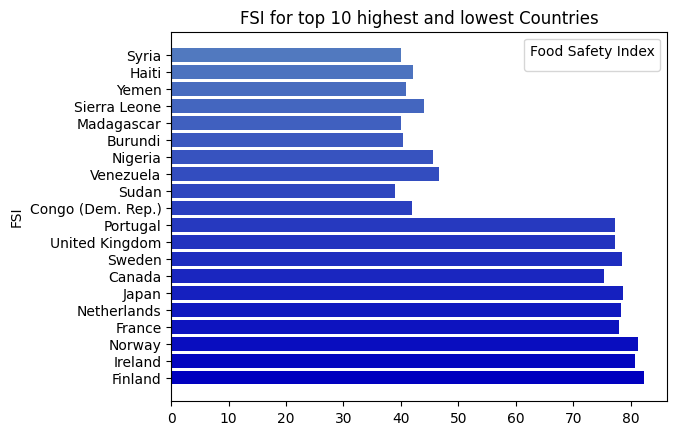

In [152]:
fig, ax = plt.subplots()

my_colors = [(x/60.0, x/40.0, 0.75) for x in range(len(df_fsi_top20))]
ax.barh(df_fsi_top20["Name"], df_fsi_top20["averageFSI"], color=my_colors)
ax.set_ylabel('FSI')
ax.set_title('FSI for top 10 highest and lowest Countries')
ax.legend(title='Food Safety Index')
plt.show()

In [186]:
df_by_region = df_food_safety.groupby("region").mean()
df_by_region

C:\Users\lesli\AppData\Local\Temp\ipykernel_3576\1639515546.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,COUNTRY_ID,Rank,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Change,country-code,region-code,sub-region-code,intermediate-region-code,Unnamed: 11,averageFSI
region,,,,,,,,,,,,,,,,,,,,
Africa,54.967742,90.967742,43.767742,44.506452,46.329032,47.609677,47.609677,47.661290,47.774194,49.112903,49.590323,49.277419,48.664516,-0.612903,478.903226,2.0,171.838710,13.615385,NaN,47.813548
Americas,48.285714,51.190476,60.090476,62.123810,62.952381,63.366667,64.304762,65.119048,66.295238,66.038095,65.823810,65.447619,64.800000,-0.647619,373.952381,19.0,381.095238,10.473684,NaN,64.627143
Asia,66.531250,56.312500,56.425000,58.153125,59.193750,60.109375,60.825000,61.487500,62.643750,62.931250,62.459375,62.159375,62.843750,0.684375,474.750000,142.0,85.750000,NaN,NaN,61.280625
Europe,57.576923,23.192308,70.015385,70.826923,71.969231,73.053846,73.519231,74.707692,74.711538,75.084615,75.111538,74.573077,74.757692,0.184615,452.730769,150.0,131.076923,NaN,NaN,73.831538
Oceania,35.000000,18.000000,71.700000,74.000000,76.150000,75.250000,76.400000,77.050000,77.050000,76.650000,75.850000,74.050000,76.600000,2.550000,295.000000,9.0,53.000000,NaN,NaN,75.905000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


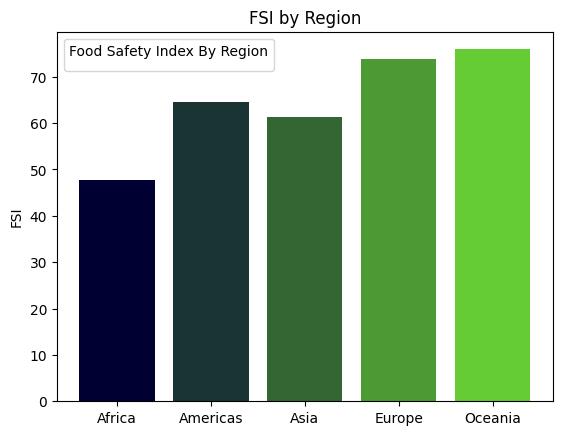

In [190]:
fig, ax = plt.subplots()
my_colors = [(x/10.0, x/5.0, 0.2) for x in range(len(df_fsi_top20))]
ax.bar(df_by_region.index, df_by_region["averageFSI"], color=my_colors)
ax.set_ylabel('FSI')
ax.set_title('FSI by Region')
ax.legend(title='Food Safety Index By Region')
plt.show()
 

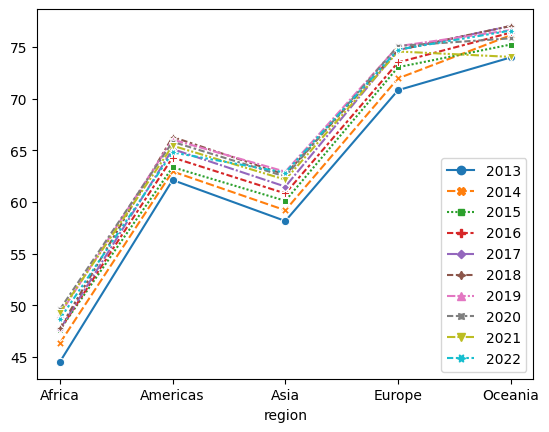

In [218]:
sns.lineplot(data=df_by_region.iloc[:,3:13], markers=True)
sns.title =" FSI By Region along the Years"